In [1]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt

In [2]:
f=open("October(1).json","rb")
res=f.read()
tweet_2020=json.loads(res)

In [3]:
f1=open("tweets_response.json","rb")
res1=f1.read()
tweet_2021=json.loads(res1)

In [4]:
#tweet

In [5]:
#tweet=json.loads("tweets_response.json")

In [6]:
def moving_average(data_array, n=3):
    """
    Calcuate the moving average based on the specific data array.
    :param data_array: the array stored data to be calculated.
    :param n: the number of data in one time
    :return: Generate which contains the result
    """
    it = iter(data_array)
 
    d = deque(itertools.islice(it, n - 1))
    s = sum(d)
    # In the first round, to avoid getting extra element, so need zero in the head of queue.
    d.appendleft(0)
    for elem in it:
        s += elem - d.popleft()
        d.append(elem)
        yield s / float(n)
    return d


In [7]:
case1=pd.read_excel("oct case.xlsx")

In [8]:
case1

,date,case1,date1,case2,date2
0,2020-10-12,12,2021-10-12,311764,10.12
1,2020-10-13,4,2021-10-13,269975,10.13
2,2020-10-14,4,2021-10-14,362514,10.14
3,2020-10-15,2,2021-10-15,338949,10.15
4,2020-10-16,0,2021-10-16,383618,10.16
5,2020-10-17,2,2021-10-17,432009,10.17
6,2020-10-18,0,2021-10-18,394551,10.18


In [9]:
import  seaborn as sns

In [10]:
#cases_1.plot.bar(data=case1)

In [11]:
#sns.barplot(y="case1", data=cases_1)

In [12]:
case2=pd.read_excel("case2.xlsx")

In [13]:
case2

,date1,cases,site
0,2021-05-11,1,Melbourne
1,2021-05-12,1,Melbourne
2,2021-05-13,1,Melbourne
3,2021-05-14,1,Melbourne
4,2021-05-15,4,Melbourne
5,2021-05-16,1,Melbourne
6,2021-05-17,0,Melbourne
7,2021-05-18,1,Melbourne
8,2021-05-11,619815,world
9,2021-05-12,655623,world


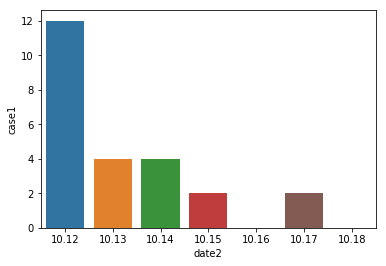

In [14]:
sns.barplot(y="case1",x="date2",data=case1)

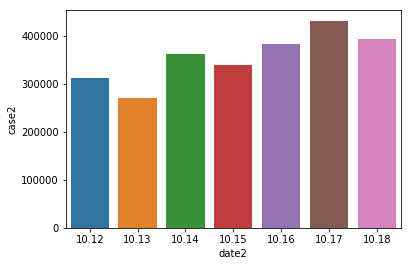

In [15]:
sns.barplot(y="case2",x="date2",data=case1)

In [16]:
moving_average(case1["case1"],2)

<generator object moving_average at 0x000002340A07FB48>

In [17]:
def moving_average1(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [18]:
case1_ma=moving_average1(np.asarray(case1["case1"]),2)

In [19]:
#sns.plot()

In [20]:
case1_ma

array([8., 4., 3., 1., 1., 1.])

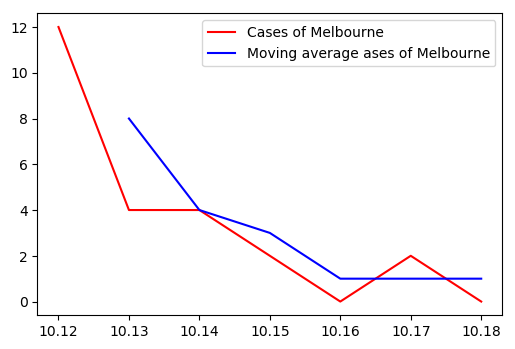

In [21]:
plt.figure(dpi=100)
date1=["10.12","10.13","10.14","10.15","10.16","10.17","10.18"]
date2=["10.13","10.14","10.15","10.16","10.17","10.18"]
plt.plot(date1,case1["case1"],'r',label='Cases of Melbourne')
plt.plot(date2,case1_ma,'b',label='Moving average ases of Melbourne')
plt.legend(loc=0)
plt.show()

In [22]:
case2_ma=moving_average1(np.asarray(case1["case2"]),2)

In [23]:
case2_ma

array([290869.5, 316244.5, 350731.5, 361283.5, 407813.5, 413280. ])

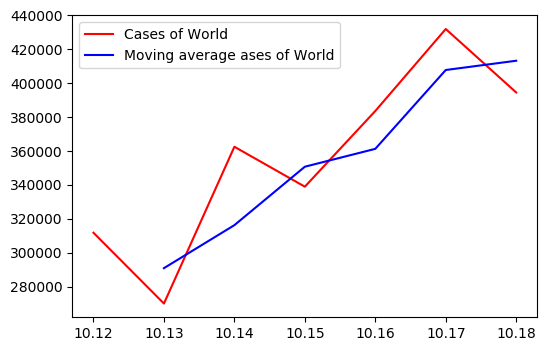

In [24]:
plt.figure(dpi=100)
date1=["10.12","10.13","10.14","10.15","10.16","10.17","10.18"]
date2=["10.13","10.14","10.15","10.16","10.17","10.18"]
plt.plot(date1,case1["case2"],'r',label='Cases of World')
plt.plot(date2,case2_ma,'b',label='Moving average ases of World')
plt.legend(loc=0)
plt.show()

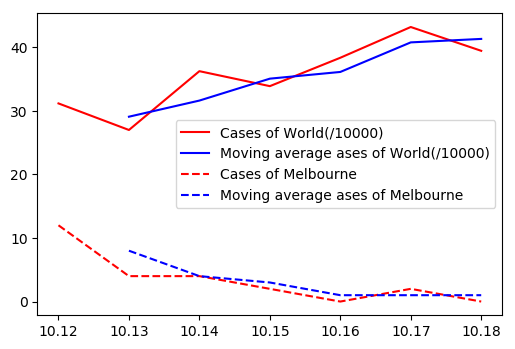

In [25]:
plt.figure(dpi=100)
date1=["10.12","10.13","10.14","10.15","10.16","10.17","10.18"]
date2=["10.13","10.14","10.15","10.16","10.17","10.18"]
plt.plot(date1,case1["case2"]/10000,'r',label='Cases of World(/10000)')
plt.plot(date2,case2_ma/10000,'b',label='Moving average ases of World(/10000)')
plt.plot(date1,case1["case1"],'r--',label='Cases of Melbourne')
plt.plot(date2,case1_ma,'b--',label='Moving average ases of Melbourne')
plt.legend(loc=0)
plt.show()

In [27]:
data_tweet_2020=pd.DataFrame(tweet_2020)
data_tweet_2021=pd.DataFrame(tweet_2021)

In [28]:
data_tweet_2020.head()

,total_rows,offset,rows
0,128459,51346,"{'id': '1314717423606484992', 'key': ['2020', ..."
1,128459,51346,"{'id': '1314717432850911232', 'key': ['2020', ..."
2,128459,51346,"{'id': '1314717448696807425', 'key': ['2020', ..."
3,128459,51346,"{'id': '1314717722068959234', 'key': ['2020', ..."
4,128459,51346,"{'id': '1314717731887804416', 'key': ['2020', ..."


In [29]:
len(data_tweet_2020)

64172

In [30]:
#data_tweet.loc[1,"rows"].split(str=" ")

In [31]:
#for i in range(12961):
#    df=pd.DataFrame(data_tweet.loc[i,"rows"]))
    

In [32]:
#data_tweet.loc[1,"rows"].items()

In [33]:
#data_tweet.loc[1,"rows"]

In [34]:
#data_tweet.loc[1,"rows"]["value"]["text"]

In [35]:
#day_='Mon May 10 22:17:20 +0000 2021'.split(" ")
#day_[1]+" "+day_[2]+" "+ day_[5]


In [36]:
#2020tweet时间提取
ids=[]
key=[]
text=[]
sentiment=[]
created_at=[]
retweet_count=[]
month=[]
day=[]
favorite_count=[]
for i in range(len(data_tweet_2020)):
    ids.append(data_tweet_2020.loc[i,"rows"]["id"])
    key.append(data_tweet_2020.loc[i,"rows"]["key"])
    #有些tweet没有sentiment，所以不取了
    #sentiment.append(data_tweet.loc[i,"rows"]["value"]["sentiment"])
    #text.append(data_tweet.loc[i,"rows"]["value"]["text"])
    created_at.append(data_tweet_2020.loc[i,"rows"]["value"]["created_at"])
    #retweet_count.append(data_tweet.loc[i,"rows"]["value"]["retweet_count"])
    #favorite_count.append(data_tweet.loc[i,"rows"]["value"]["favorite_count"])
    #days=data_tweet.loc[i,"rows"]["value"]["created_at"].split(" ")
    days=data_tweet_2020.loc[i,"rows"]["key"]
    #day.append(days[1]+" "+days[2]+" "+ days[5])
    day.append(days[0]+" "+days[1]+" "+days[2])
#data_tweets=pd.DataFrame({"id":ids,"key":key,"sentiment":sentiment,"text":text,"created_at":created_at,"retweet_count":retweet_count,"favorite_count":favorite_count,"day":day})
data_tweets_2020=pd.DataFrame({"id":ids,"key":key,"created_at":created_at,"day":day})
    

In [37]:
data_tweets_2020.head()

,id,key,created_at,day
0,1314717423606484992,"[2020, Oct, 10]",Sat Oct 10 00:00:34 +0000 2020,2020 Oct 10
1,1314717432850911232,"[2020, Oct, 10]",Sat Oct 10 00:00:36 +0000 2020,2020 Oct 10
2,1314717448696807425,"[2020, Oct, 10]",Sat Oct 10 00:00:40 +0000 2020,2020 Oct 10
3,1314717722068959234,"[2020, Oct, 10]",Sat Oct 10 00:01:45 +0000 2020,2020 Oct 10
4,1314717731887804416,"[2020, Oct, 10]",Sat Oct 10 00:01:48 +0000 2020,2020 Oct 10


In [38]:
#days=data_tweet.loc[1,"rows"]["key"]
#days[0]+" "+days[1]+" "+days[2]


In [39]:
data_tweets_2020.groupby("day").count()

,id,key,created_at
day,,,
2020 Oct 10,4812,4812,4812
2020 Oct 11,5260,5260,5260
2020 Oct 12,4150,4150,4150
2020 Oct 13,5245,5245,5245
2020 Oct 14,5018,5018,5018
2020 Oct 15,4371,4371,4371
2020 Oct 16,5868,5868,5868
2020 Oct 17,7036,7036,7036
2020 Oct 18,8154,8154,8154


In [40]:
#data_tweets.groupby("day").count().loc["Oct 10 2020":"Oct 12 2020","id"]

In [41]:
#tweet_count=np.asarray(data_tweets.groupby("day").count().loc["2020 Oct 12":"2020 Oct 18","id"])

In [42]:
#tweet_count

In [43]:
#提取2021年时间
ids=[]
key=[]
text=[]
sentiment=[]
created_at=[]
retweet_count=[]
month=[]
day=[]
favorite_count=[]
for i in range(12951):
    ids.append(data_tweet_2021.loc[i,"rows"]["id"])
    key.append(data_tweet_2021.loc[i,"rows"]["key"])
    #有些tweet没有sentiment，所以不取了
    #sentiment.append(data_tweet.loc[i,"rows"]["value"]["sentiment"])
    #text.append(data_tweet.loc[i,"rows"]["value"]["text"])
    created_at.append(data_tweet_2021.loc[i,"rows"]["value"]["created_at"])
    #retweet_count.append(data_tweet.loc[i,"rows"]["value"]["retweet_count"])
    #favorite_count.append(data_tweet.loc[i,"rows"]["value"]["favorite_count"])
    days=data_tweet_2021.loc[i,"rows"]["value"]["created_at"].split(" ")
    day.append(days[1]+" "+days[2]+" "+ days[5])
#data_tweets=pd.DataFrame({"id":ids,"key":key,"sentiment":sentiment,"text":text,"created_at":created_at,"retweet_count":retweet_count,"favorite_count":favorite_count,"day":day})
data_tweets_2021=pd.DataFrame({"id":ids,"key":key,"created_at":created_at,"day":day})
    

In [44]:
data_tweets_2021.head()

,id,key,created_at,day
0,1344941724192411650,1344941724192411650,Fri Jan 01 09:41:09 +0000 2021,Jan 01 2021
1,1391880059158372352,1391880059158372352,Mon May 10 22:17:20 +0000 2021,May 10 2021
2,1391880274254856193,1391880274254856193,Mon May 10 22:18:11 +0000 2021,May 10 2021
3,1391880708243615746,1391880708243615746,Mon May 10 22:19:55 +0000 2021,May 10 2021
4,1391880708579217411,1391880708579217411,Mon May 10 22:19:55 +0000 2021,May 10 2021


In [48]:
tweet_count_2021=np.asarray(data_tweets_2021.groupby("day").count().loc["May 12 2021":"May 18 2021","id"])

In [49]:
tweet_count_2020=np.asarray(data_tweets_2020.groupby("day").count().loc["2020 Oct 12":"2020 Oct 18","id"])

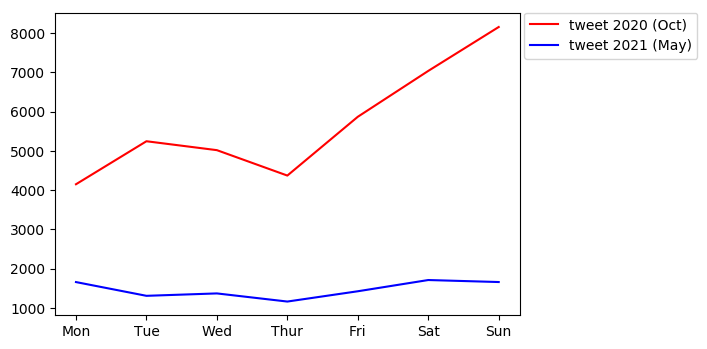

In [54]:
plt.figure(dpi=100)
x=["Mon","Tue","Wed","Thur","Fri","Sat","Sun"]
plt.plot(x,tweet_count_2020,"r",label="tweet 2020 (Oct)")
plt.plot(x,tweet_count_2021,"b",label="tweet 2021 (May)")
plt.legend(loc=[1.01,0.85])
plt.show()

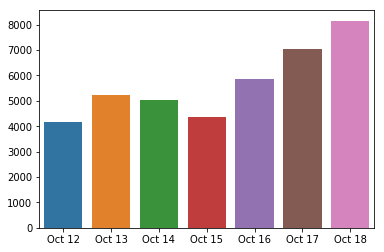

In [67]:
sns.barplot(y=tweet_count,x=["Oct 12","Oct 13","Oct 14","Oct 15","Oct 16","Oct 17","Oct 18"])

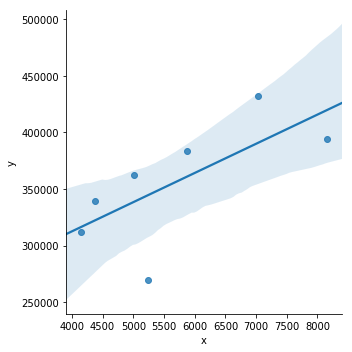

In [57]:
#import seaborn as sns 
abc=pd.DataFrame({"y":case1["case2"],"x":tweet_count})
sns.lmplot(x="x", y="y",data=abc)

In [58]:
#np.polyfit(x=tweet_count,y=case1["case2"],deg=1)
from scipy.stats import linregress as line

In [59]:
line(x=tweet_count,y=case1["case2"])

LinregressResult(slope=25.776110899193657, intercept=209486.88422204662, rvalue=0.6894704254203604, pvalue=0.08656829983209988, stderr=12.109982859735464)

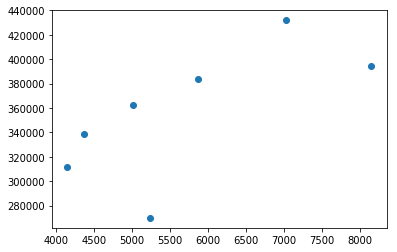

In [60]:
plt.scatter(tweet_count, case1["case2"])


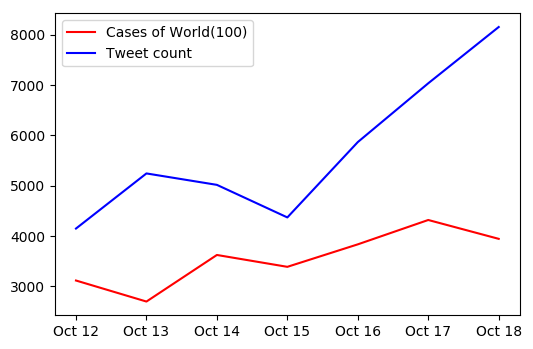

In [71]:
plt.figure(dpi=100)
date=["Oct 12","Oct 13","Oct 14","Oct 15","Oct 16","Oct 17","Oct 18"]
plt.plot(date,case1["case2"]/100,'r',label='Cases of World(100)')
plt.plot(date,tweet_count,'b',label='Tweet count ')
plt.legend(loc=0)
plt.show()

In [208]:
#data_tweet.loc[0,"rows"]["value"]["sentiment"]

In [ ]:
#data_tweet.loc[0,"rows"]

In [68]:
case1["case2"]/1000

0    311.764
1    269.975
2    362.514
3    338.949
4    383.618
5    432.009
6    394.551
Name: case2, dtype: float64

In [209]:
times=[]
for i in range(len(data_tweet)):
    time=data_tweets.loc[i,"created_at"].split(" ")[3].split(":")[0]
    times.append(time)
data_tweets["time"]=times

In [210]:
data_tweets.head(15)

,id,key,created_at,day,time
0,1314717423606484992,"[2020, Oct, 10]",Sat Oct 10 00:00:34 +0000 2020,2020 Oct 10,00
1,1314717432850911232,"[2020, Oct, 10]",Sat Oct 10 00:00:36 +0000 2020,2020 Oct 10,00
2,1314717448696807425,"[2020, Oct, 10]",Sat Oct 10 00:00:40 +0000 2020,2020 Oct 10,00
3,1314717722068959234,"[2020, Oct, 10]",Sat Oct 10 00:01:45 +0000 2020,2020 Oct 10,00
4,1314717731887804416,"[2020, Oct, 10]",Sat Oct 10 00:01:48 +0000 2020,2020 Oct 10,00
5,1314717739022381056,"[2020, Oct, 10]",Sat Oct 10 00:01:49 +0000 2020,2020 Oct 10,00
6,1314717744902799360,"[2020, Oct, 10]",Sat Oct 10 00:01:51 +0000 2020,2020 Oct 10,00
7,1314717749176725504,"[2020, Oct, 10]",Sat Oct 10 00:01:52 +0000 2020,2020 Oct 10,00
8,1314717778264244225,"[2020, Oct, 10]",Sat Oct 10 00:01:59 +0000 2020,2020 Oct 10,00
9,1314717803442659328,"[2020, Oct, 10]",Sat Oct 10 00:02:05 +0000 2020,2020 Oct 10,00


In [211]:
tweets_1012=data_tweets[data_tweets.loc[:,"day"]=="2020 Oct 12"]

In [212]:
count_bytime_1012=np.asarray(tweets_1012.groupby("time").count()["id"])

In [213]:
count_bytime_1012

array([222, 222, 206, 224, 213, 221, 211, 191, 166, 186, 179, 177, 149,
       128, 114,  88,  71,  79,  88,  83, 175, 227, 241, 289], dtype=int64)

In [215]:
tweets_1013=data_tweets[data_tweets.loc[:,"day"]=="2020 Oct 13"]
count_bytime_1013=np.asarray(tweets_1013.groupby("time").count()["id"])

In [216]:
tweets_1014=data_tweets[data_tweets.loc[:,"day"]=="2020 Oct 14"]
count_bytime_1014=np.asarray(tweets_1014.groupby("time").count()["id"])

In [217]:
tweets_1015=data_tweets[data_tweets.loc[:,"day"]=="2020 Oct 15"]
count_bytime_1015=np.asarray(tweets_1015.groupby("time").count()["id"])

In [218]:
tweets_1016=data_tweets[data_tweets.loc[:,"day"]=="2020 Oct 16"]
count_bytime_1016=np.asarray(tweets_1016.groupby("time").count()["id"])

In [219]:
tweets_1017=data_tweets[data_tweets.loc[:,"day"]=="2020 Oct 17"]
count_bytime_1017=np.asarray(tweets_1017.groupby("time").count()["id"])

In [221]:
tweets_1018=data_tweets[data_tweets.loc[:,"day"]=="2020 Oct 18"]
count_bytime_1018=np.asarray(tweets_1018.groupby("time").count()["id"])

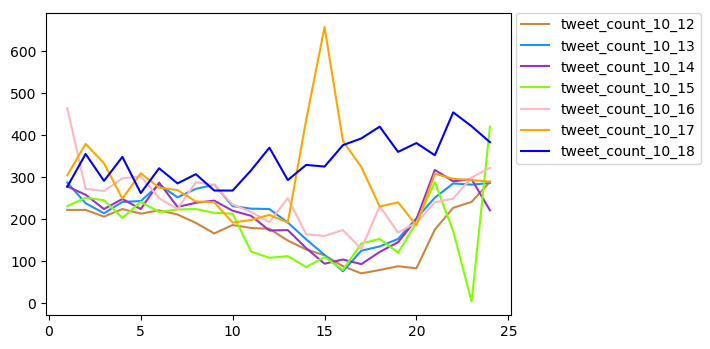

In [222]:
plt.figure(dpi=100)
#date=["5.11","5.12","5.13","5.14","5.15","5.16","5.17","5.18"]
x=list(range(1,25))
plt.plot(x,count_bytime_1012,'peru',label='tweet_count_10_12')
plt.plot(x,count_bytime_1013,'dodgerblue',label='tweet_count_10_13')
plt.plot(x,count_bytime_1014,'darkorchid',label='tweet_count_10_14')
plt.plot(x,count_bytime_1015,'chartreuse',label='tweet_count_10_15')
plt.plot(x,count_bytime_1016,'lightpink',label='tweet_count_10_16')
plt.plot(x,count_bytime_1017,'orange',label='tweet_count_10_17')
plt.plot(list(range(1,25)),count_bytime_1018,'b',label='tweet_count_10_18')
plt.legend(loc=[1.01,0.5])
plt.show()

In [223]:
tweets_1012

,id,key,created_at,day,time
10072,1315442089602080768,"[2020, Oct, 12]",Mon Oct 12 00:00:08 +0000 2020,2020 Oct 12,00
10073,1315442093133910017,"[2020, Oct, 12]",Mon Oct 12 00:00:09 +0000 2020,2020 Oct 12,00
10074,1315442103497916416,"[2020, Oct, 12]",Mon Oct 12 00:00:11 +0000 2020,2020 Oct 12,00
10075,1315442117502672896,"[2020, Oct, 12]",Mon Oct 12 00:00:15 +0000 2020,2020 Oct 12,00
10076,1315442143758938112,"[2020, Oct, 12]",Mon Oct 12 00:00:21 +0000 2020,2020 Oct 12,00
10077,1315442144258138113,"[2020, Oct, 12]",Mon Oct 12 00:00:21 +0000 2020,2020 Oct 12,00
10078,1315442167683444739,"[2020, Oct, 12]",Mon Oct 12 00:00:27 +0000 2020,2020 Oct 12,00
10079,1315442172762624000,"[2020, Oct, 12]",Mon Oct 12 00:00:28 +0000 2020,2020 Oct 12,00
10080,1315442185018306560,"[2020, Oct, 12]",Mon Oct 12 00:00:31 +0000 2020,2020 Oct 12,00
10081,1315442425129648129,"[2020, Oct, 12]",Mon Oct 12 00:01:28 +0000 2020,2020 Oct 12,00


In [228]:
"""
#time to Australia
np.abs()
plt.figure(dpi=100)
#date=["5.11","5.12","5.13","5.14","5.15","5.16","5.17","5.18"]
x=list(range(1,25))
plt.plot(x,count_bytime_512,'peru',label='tweet_count_5_12')
plt.plot(x,count_bytime_513,'dodgerblue',label='tweet_count_5_13')
plt.plot(x,count_bytime_514,'darkorchid',label='tweet_count_5_14')
plt.plot(x,count_bytime_515,'chartreuse',label='tweet_count_5_15')
plt.plot(x,count_bytime_516,'lightpink',label='tweet_count_5_16')
plt.plot(x,count_bytime_517,'orange',label='tweet_count_5_17')
plt.plot(list(range(1,24)),count_bytime_518,'b',label='tweet_count_5_18')
plt.legend(loc=[1.01,0.5])
plt.show()
"""

'\n#time to Australia\nnp.abs()\nplt.figure(dpi=100)\n#date=["5.11","5.12","5.13","5.14","5.15","5.16","5.17","5.18"]\nx=list(range(1,25))\nplt.plot(x,count_bytime_512,\'peru\',label=\'tweet_count_5_12\')\nplt.plot(x,count_bytime_513,\'dodgerblue\',label=\'tweet_count_5_13\')\nplt.plot(x,count_bytime_514,\'darkorchid\',label=\'tweet_count_5_14\')\nplt.plot(x,count_bytime_515,\'chartreuse\',label=\'tweet_count_5_15\')\nplt.plot(x,count_bytime_516,\'lightpink\',label=\'tweet_count_5_16\')\nplt.plot(x,count_bytime_517,\'orange\',label=\'tweet_count_5_17\')\nplt.plot(list(range(1,24)),count_bytime_518,\'b\',label=\'tweet_count_5_18\')\nplt.legend(loc=[1.01,0.5])\nplt.show()\n'

In [225]:
#count_bytime_518

In [227]:
count_bytime_1018[[10,11,12,13,14,15,16,17,18,19,20,21,22,0,1,2,3,4,5,6,7,8,9]]

array([316, 370, 293, 329, 325, 376, 392, 420, 360, 381, 352, 454, 421,
       277, 355, 291, 348, 262, 321, 285, 307, 268, 268], dtype=int64)

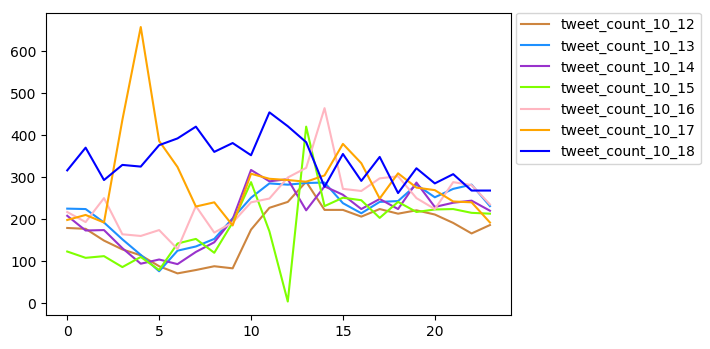

In [229]:
time_aus=[10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4,5,6,7,8,9]
#time_aus_518=[10,11,12,13,14,15,16,17,18,19,20,21,22,0,1,2,3,4,5,6,7,8,9]
plt.figure(dpi=100)
x=list(range(0,24))
plt.plot(x,count_bytime_1012[time_aus],'peru',label='tweet_count_10_12')
plt.plot(x,count_bytime_1013[time_aus],'dodgerblue',label='tweet_count_10_13')
plt.plot(x,count_bytime_1014[time_aus],'darkorchid',label='tweet_count_10_14')
plt.plot(x,count_bytime_1015[time_aus],'chartreuse',label='tweet_count_10_15')
plt.plot(x,count_bytime_1016[time_aus],'lightpink',label='tweet_count_10_16')
plt.plot(x,count_bytime_1017[time_aus],'orange',label='tweet_count_10_17')
plt.plot(x,count_bytime_1018[time_aus],'b',label='tweet_count_10_18')
plt.legend(loc=[1.01,0.5])
plt.show()

In [232]:
tweet_count_1019=count_bytime_1017[time_aus][0:24]*0.5+count_bytime_1018[time_aus][0:24]*0.5

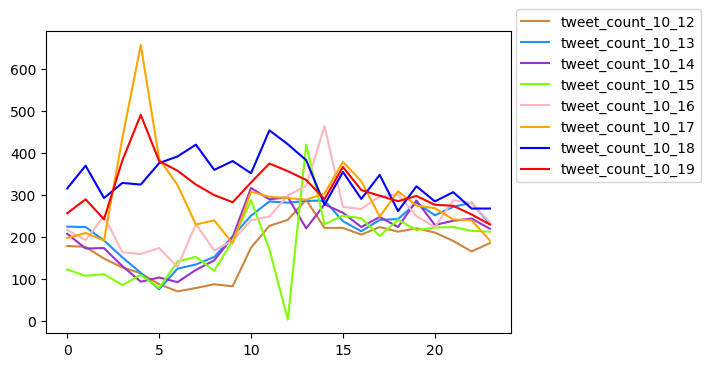

In [234]:
time_aus=[10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2,3,4,5,6,7,8,9]
#time_aus_518=[10,11,12,13,14,15,16,17,18,19,20,21,22,0,1,2,3,4,5,6,7,8,9]
plt.figure(dpi=100)
x=list(range(0,24))
plt.plot(x,count_bytime_1012[time_aus],'peru',label='tweet_count_10_12')
plt.plot(x,count_bytime_1013[time_aus],'dodgerblue',label='tweet_count_10_13')
plt.plot(x,count_bytime_1014[time_aus],'darkorchid',label='tweet_count_10_14')
plt.plot(x,count_bytime_1015[time_aus],'chartreuse',label='tweet_count_10_15')
plt.plot(x,count_bytime_1016[time_aus],'lightpink',label='tweet_count_10_16')
plt.plot(x,count_bytime_1017[time_aus],'orange',label='tweet_count_10_17')
plt.plot(x,count_bytime_1018[time_aus],'b',label='tweet_count_10_18')
plt.plot(x,tweet_count_1019,'r',label='tweet_count_10_19')
plt.legend(loc=[1.01,0.5])
plt.show()